<a href="https://colab.research.google.com/github/indranitiwari21/PythonForBeginners/blob/master/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing Libraries
import keras
import theano
import tensorflow
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()


In [0]:
X_train.shape
X_test.shape

(10000, 32, 32, 3)

In [0]:
y_train.shape


(50000, 1)

In [0]:
y_test.shape

(10000, 1)

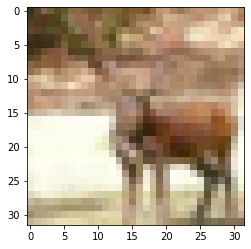

In [0]:
#Data Visualization
i = 1001
plt.imshow(X_train[i])

In [0]:
print(y_train[i])

[4]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


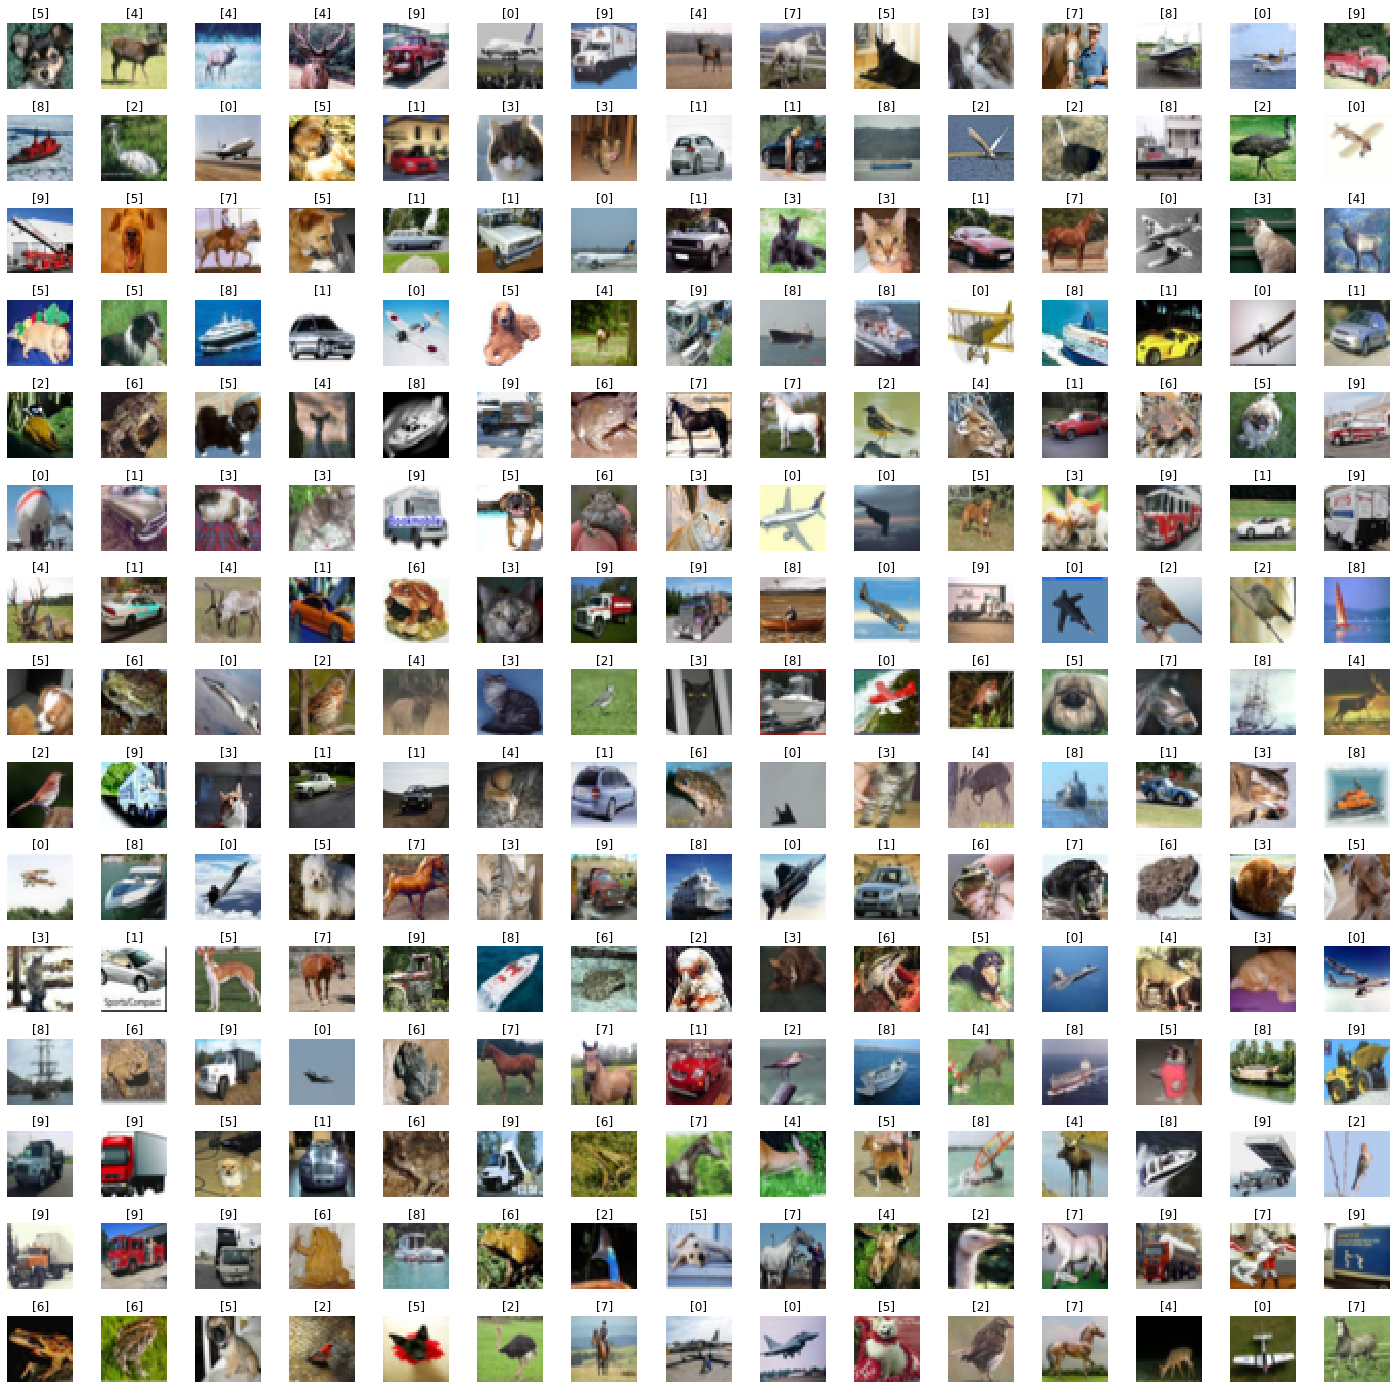

In [0]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid,W_grid,figsize =(25,25))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0,n_training)# pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

    plt.subplots_adjust(hspace = 0.4)


In [0]:
n_training


50000

In [0]:
#Data Preparation
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')
num_categ = 10
y_train


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
y_train = keras.utils.to_categorical(y_train,num_categ)
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_test = keras.utils.to_categorical(y_test,num_categ)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [0]:
X_train = X_train/255
X_test = X_test/255
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [0]:
#Model training
from keras.models import Sequential
from keras.layers import  Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
cnn_model = Sequential()


In [0]:
cnn_model.add (Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = Input_shape))

In [0]:
cnn_model.add (Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))

In [0]:
cnn_model.add(MaxPooling2D(2,2))

In [0]:
cnn_model.add(Dropout(0.3))

In [0]:
cnn_model.add (Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'))

In [0]:
cnn_model.add (Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'))

In [0]:
cnn_model.add(MaxPooling2D(2,2))

In [0]:
cnn_model.add(Dropout(0.2))

In [0]:
cnn_model.add(Flatten())

In [0]:
cnn_model.add(Dense(units = 512, activation = 'relu'))

In [0]:
cnn_model.add(Dense(units = 512, activation = 'relu'))

In [0]:
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [0]:
cnn_model.compile(loss = 'categorical_crossentropy',optimizer = keras.optimizers.rmsprop(lr = 0.001),metrics = ['accuracy'])

In [0]:
history =cnn_model.fit(X_train,y_train,batch_size = 32,epochs = 100,shuffle = True)

Epoch 1/100
50000/50000 [==============================] - 184s 4ms/step - loss: 14.5063 - acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 184s 4ms/step - loss: 14.5063 - acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 184s 4ms/step - loss: 14.5063 - acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 184s 4ms/step - loss: 14.5063 - acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 184s 4ms/step - loss: 14.5063 - acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 184s 4ms/step - loss: 14.5063 - acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 184s 4ms/step - loss: 14.5063 - acc: 0.1000
Epoch 8/100
50000/50000 [==============================] - 185s 4ms/step - loss: 14.5063 - acc: 0.1000
Epoch 9/100
50000/50000 [==============================] - 185s 4ms/step - loss: 14.5063 - acc: 0.1000
Epoch 10/100
50000/50000 [==============================] - 184s 4ms/step

In [0]:
#Evaluate the model
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

ValueError: ignored

In [0]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

In [0]:
y_test

In [0]:
y_test = y_test.argmax(1)
y_test

In [0]:
L = 7
W = 7
fig, axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction ={}\n True = {}'.format(predicted_classes[i],y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)  

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
cm

In [0]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)

In [0]:
import os
directory = os.path.joint(os.getcwd(),'saved_models')
if not os.path.isdir(directory):
       os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)     



In [0]:
#Data Augmentation for the CIFAR-10 dataset
import keras
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train.shape

In [0]:
n = 8
X_train_sample = X_train[:n]                       

In [0]:
X_train_sample.shape

In [0]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90)
#dataget_train = ImageDataGenerator(vertical_flip = True)
#dataget_train = ImageDataGenerator(Height_shift_range = 0.5)
#dataget_train = ImageDataGenerator(brightness_range=(1,5))

dataget_train.fit(X_train_sample)
                                    

In [0]:
from scipy.misc import toimage

 fig = plt.figure(figsize = (20,2))
 for X_batch in dataget_train.flow(X_train_sample,batch_size = n):
      for i in rangen(0,n):
           ax = fig.add_subplot(1,n,i+1)
           ax.imshow(toimage(X_batch[i]))
      fig.suptitle('Augmented image('rotated 90 degrees)')
       plt.show()
       break;

        
       

In [0]:
#Model Training Using Augmented dataset
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                             rotation_range = 90,
                             width_shift_range = 0.1,
                             horizontal_flip = True,
                             vertical_flip = True
                             )

In [0]:
datagen_fit(X_train)

In [0]:
cnn_model.fit_generator(datagen.flow(X_train,y_train,batch_size = 32),epochs = 2)

In [0]:
score = cnn_model.evaluate(X_test,y_test)
print('Test accuracy',score[1])

In [0]:
#Save the model
directory = os.path.joint(os.getcwd(),'saved_models')
if not os.path.isdir(directory):
       os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)   
